In [1]:
#!user/bin/env python
# Author: Yuxin Qin
# Created: 2021-12
# File: Behavior_Kmeans.ipynb
# Email: qinyx3@mail2.sysu.edu.cn
# Usage: This file is used to separate the mice behavior stage by the method kmeans.

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import Counter
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import random
from sklearn.decomposition import PCA 

In [3]:
# Basic information

# The total section
section = 10

# The mice number
female_num = 10
male_num = 10
mice_num = female_num + male_num

# The time point
time_vec = []
for i in range(section):
    time_vec.append(str(i+1) + 'min')
print(time_vec)

# The mice name
mice_vec = []
for i in range(female_num):
    mice_vec.append('Female'+ str(i+1))
for i in range(male_num):
    mice_vec.append('Male'+ str(i+1))
print(mice_vec)

['1min', '2min', '3min', '4min', '5min', '6min', '7min', '8min', '9min', '10min']
['Female1', 'Female2', 'Female3', 'Female4', 'Female5', 'Female6', 'Female7', 'Female8', 'Female9', 'Female10', 'Male1', 'Male2', 'Male3', 'Male4', 'Male5', 'Male6', 'Male7', 'Male8', 'Male9', 'Male10']


In [4]:
# read in the feature data and normalize it
data = pd.read_csv('./output_data/feature_data_accumulative_time.csv', index_col=0)
features = np.array(data)

# normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# set up the kmeans parameter and run it
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=section*mice_num,
    max_iter=300,
    random_state=42)
kmeans.fit(scaled_features)
kmeans.inertia_
kmeans.cluster_centers_
kmeans.n_iter_

# get the predicted cluster
predict = kmeans.labels_.reshape(mice_num, section)
predict_df = pd.DataFrame(predict, index = mice_vec,columns = time_vec)
print(predict_df)

          1min  2min  3min  4min  5min  6min  7min  8min  9min  10min
Female1      2     0     0     0     0     0     0     0     0      0
Female2      2     2     0     0     0     0     0     0     0      0
Female3      2     2     2     0     0     0     0     0     0      0
Female4      2     2     2     2     2     2     2     0     0      0
Female5      2     2     2     2     2     2     0     0     0      0
Female6      2     2     2     2     0     0     0     0     0      0
Female7      2     2     2     2     2     0     0     0     0      0
Female8      2     2     2     2     2     2     2     2     2      0
Female9      2     2     2     2     2     2     0     0     0      0
Female10     2     2     2     2     2     2     0     0     0      0
Male1        2     2     2     1     1     1     1     1     1      1
Male2        2     2     2     1     1     1     1     1     1      1
Male3        2     2     2     2     2     2     2     1     1      1
Male4        2     2

In [5]:
# calculate the trasition minutes
mean_each_mice = []
for j in range(mice_num):
    for i in range(section-1):
        if predict[j, i+1] != predict[j, i]: 
            mean_each_mice.append(i+1)
print('The trasition time of each mice:')
print(mean_each_mice)
print('Female average transition time: ')
female_mean = sum(mean_each_mice[1:10])/female_num
print(female_mean)
print('Male average transition time: ')
male_mean = sum(mean_each_mice[10:20])/male_num
print(male_mean)

The trasition time of each mice:
[1, 2, 3, 7, 6, 4, 5, 9, 6, 6, 3, 3, 7, 3, 5, 4, 2, 4, 5, 5]
Female average transition time: 
4.8
Male average transition time: 
4.1


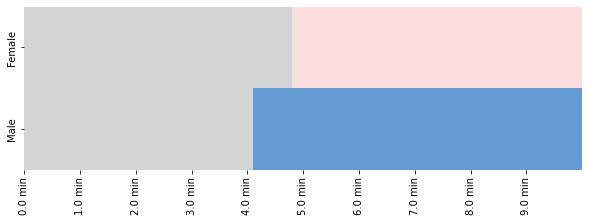

In [6]:
# Plot1: mean transition time
dat = np.zeros((2,100))
dat[0, 48:100] = 1
dat[1, 41:100] = 2
dat = pd.DataFrame(dat)
dat.index = ['Female', 'Male']
col = []
for i in range(10):
    for j in range(10):
        col.append(str(i) + '.' + str(j) + ' min')
fig1 = plt.figure(figsize = (10,3))
sns.heatmap(dat, cmap=['#D4D4D4', '#FADEDD', '#629BD2'], cbar= None)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90], [col[0], col[10], col[20], col[30], col[40], col[50], col[60], col[70], col[80], col[90]])
fig1.savefig('Plots/h5_feature_data_heatmap_average' +  str(mice_num) + '.pdf', bbox_inches = 'tight')


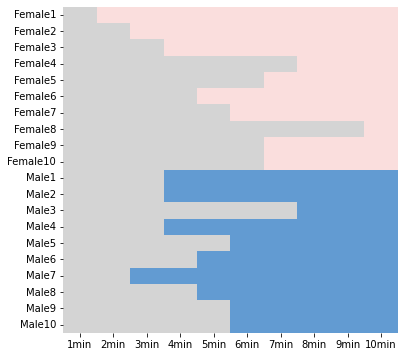

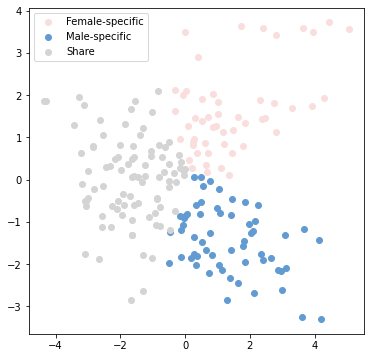

In [7]:
# Plot 2 : plot the heatmap of cluster
fig2 = plt.figure(figsize = (6,6))
sns.heatmap(predict_df,  cmap=['#FADEDD','#629BD2', '#D4D4D4'], cbar= None)
fig2.savefig('Plots/h5_feature_data_heatmap_' +  str(mice_num) + '.pdf')

# Plot3: kmeans cluster
pca = PCA(2) 
# Transform the data
df = pca.fit_transform(scaled_features)
# Get unique labels
u_labels = np.unique(kmeans.labels_)
label = kmeans.labels_
# Plot the results:    
fig3 = plt.figure(figsize = (6,6))
plt.scatter(df[label == 0 , 0] , df[label == 0 , 1] , label = 'Female-specific', c = '#FADEDD')
plt.scatter(df[label == 1 , 0] , df[label == 1 , 1] , label = 'Male-specific', c = '#629BD2')
plt.scatter(df[label == 2 , 0] , df[label == 2 , 1] , label = 'Share', c = '#D4D4D4' )
plt.legend()
plt.show()
fig3.savefig('Plots/h5_kmeans_cluster_' +  str(mice_num) + '.pdf')

(20, 10, 3)
Cluster0
[[0.   0.5  0.67 0.75 0.8  0.83 0.86 0.88 0.89 0.9 ]
 [0.   0.   0.33 0.5  0.6  0.67 0.71 0.75 0.78 0.8 ]
 [0.   0.   0.   0.25 0.4  0.5  0.57 0.62 0.67 0.7 ]
 [0.   0.   0.   0.   0.   0.   0.   0.12 0.22 0.3 ]
 [0.   0.   0.   0.   0.   0.   0.14 0.25 0.33 0.4 ]
 [0.   0.   0.   0.   0.2  0.33 0.43 0.5  0.56 0.6 ]
 [0.   0.   0.   0.   0.   0.17 0.29 0.38 0.44 0.5 ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.1 ]
 [0.   0.   0.   0.   0.   0.   0.14 0.25 0.33 0.4 ]
 [0.   0.   0.   0.   0.   0.   0.14 0.25 0.33 0.4 ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0. 

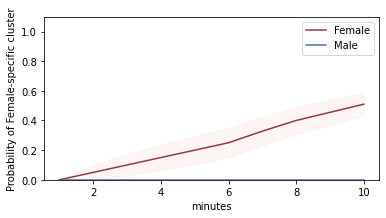

Cluster1
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.25 0.4  0.5  0.57 0.62 0.67 0.7 ]
 [0.   0.   0.   0.25 0.4  0.5  0.57 0.62 0.67 0.7 ]
 [0.   0.   0.   0.   0.   0.   0.   0.12 0.22 0.3 ]
 [0.   0.   0.   0.25 0.4  0.5  0.57 0.62 0.67 0.7 ]
 [0.   0.   0.   0.   0.   0.17 0.29 0.38 0.44 0.5 ]
 [0.   0.   0.   0.   0.2  0.33 0.43 0.5  0.56 0.6 ]
 [0.   0.   0.33 0.5  0.6  0.67 0.71 0.75 0.78 0.8 ]
 [0.   0.   0.   0.   0.2  0.33 0.43 0.5  0.56 0.6 ]
 [0.   0.   0.   0.   0.   0.17 0.29 

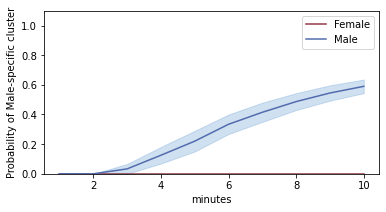

Cluster2
[[1.   0.5  0.33 0.25 0.2  0.17 0.14 0.12 0.11 0.1 ]
 [1.   1.   0.67 0.5  0.4  0.33 0.29 0.25 0.22 0.2 ]
 [1.   1.   1.   0.75 0.6  0.5  0.43 0.38 0.33 0.3 ]
 [1.   1.   1.   1.   1.   1.   1.   0.88 0.78 0.7 ]
 [1.   1.   1.   1.   1.   1.   0.86 0.75 0.67 0.6 ]
 [1.   1.   1.   1.   0.8  0.67 0.57 0.5  0.44 0.4 ]
 [1.   1.   1.   1.   1.   0.83 0.71 0.62 0.56 0.5 ]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   0.9 ]
 [1.   1.   1.   1.   1.   1.   0.86 0.75 0.67 0.6 ]
 [1.   1.   1.   1.   1.   1.   0.86 0.75 0.67 0.6 ]
 [1.   1.   1.   0.75 0.6  0.5  0.43 0.38 0.33 0.3 ]
 [1.   1.   1.   0.75 0.6  0.5  0.43 0.38 0.33 0.3 ]
 [1.   1.   1.   1.   1.   1.   1.   0.88 0.78 0.7 ]
 [1.   1.   1.   0.75 0.6  0.5  0.43 0.38 0.33 0.3 ]
 [1.   1.   1.   1.   1.   0.83 0.71 0.62 0.56 0.5 ]
 [1.   1.   1.   1.   0.8  0.67 0.57 0.5  0.44 0.4 ]
 [1.   1.   0.67 0.5  0.4  0.33 0.29 0.25 0.22 0.2 ]
 [1.   1.   1.   1.   0.8  0.67 0.57 0.5  0.44 0.4 ]
 [1.   1.   1.   1.   1.   0.83 0.71 

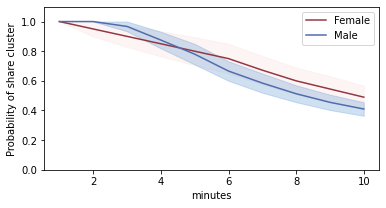

0

In [8]:
def plot_cluster(index, cluster, female_num, male_num, ylabel):
    print('Cluster' + str(cluster))
    print(index[:,:,cluster])

    # plot 1: plot the percentage of cluster
    plot_data1 =np.sum(index[0:female_num,:,cluster], axis = 0)/(mice_num/2)
    std1 = stats.sem(index[0:female_num,:,cluster], axis = 0)
    plot_data2 =np.sum(index[female_num:(female_num+male_num),:,cluster], axis = 0)/(mice_num/2)
    std2 = stats.sem(index[female_num:(female_num+male_num),:,cluster], axis = 0)
    y1_up = plot_data1+std1
    y1_down = plot_data1-std1
    y2_up = plot_data2+std2
    y2_down = plot_data2-std2

    x = np.linspace(1,10, section)

    fig2 = plt.figure(figsize = (6,3))
    plot_data = np.sum(predict_df, axis = 0)/mice_num
    print(plot_data1)
    print(plot_data2)
    plt.plot(x, plot_data1, color = '#933643', label = 'Female')
    plt.plot(x, plot_data2, color = '#516BAD', label = 'Male')
    plt.legend()
    plt.fill_between(x, y1_up, y1_down, where=(y1_down > y1_up), color='#FADEDD', alpha=0.3,
                     interpolate=True)
    plt.fill_between(x, y1_up, y1_down, where=(y1_down < y1_up), color='#FADEDD', alpha=0.3,
                     interpolate=True)
    plt.fill_between(x, y2_up, y2_down, where=(y2_down > y2_up), color='#629BD2', alpha=0.3,
                     interpolate=True)
    plt.fill_between(x, y2_up, y2_down, where=(y2_down < y2_up), color='#629BD2', alpha=0.3,
                     interpolate=True)
    plt.ylabel(ylabel)
    plt.xlabel('minutes')
    plt.ylim(0,1.1)
    fig2.savefig('Plots/h5_feature_data_sum__cluster'+ str(cluster)+ '_'+ str(female_num + male_num) + '.pdf',  bbox_inches = 'tight')
    plt.show()
    return 0 
    
    
# get the predicted cluster and the percentage of it in all clusters
index = np.zeros((len(mice_vec), len(time_vec), 3))
for j in range(len(mice_vec)):
    for i in range(len(time_vec)):
        index[j, i, 0] = np.round(Counter(predict[j,0:(i+1)])[0]/(i+1), 2)
        index[j, i, 1] = np.round(Counter(predict[j,0:(i+1)])[1]/(i+1), 2)
        index[j, i, 2] = np.round(Counter(predict[j,0:(i+1)])[2]/(i+1), 2)
print(index.shape)
    
plot_cluster(index, 0, female_num, male_num, 'Probability of Female-specific cluster')
plot_cluster(index, 1, female_num, male_num, 'Probability of Male-specific cluster')
plot_cluster(index, 2, female_num, male_num, 'Probability of share cluster')